# CSCN8000 – Artificial Intelligence Algorithms and Mathematics

# Assignment 3 


## Part 1: Model Training and Evaluation 
<b> Dataset file: Stroke Prediction Dataset (attached in the file named “stroke.csv”) 
</b>

In the dataset file, the target variable is “stroke” 


### Data Preprocessing (4 Points): 


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np




a.  Fill in the missing values in numerical/categorical columns with an appropriate way 

In [2]:
stroke_JB = pd.read_csv("stroke.csv")

In [3]:
stroke_JB.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke_JB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Check for missing values
print(stroke_JB.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
print(stroke_JB['bmi'].describe())

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


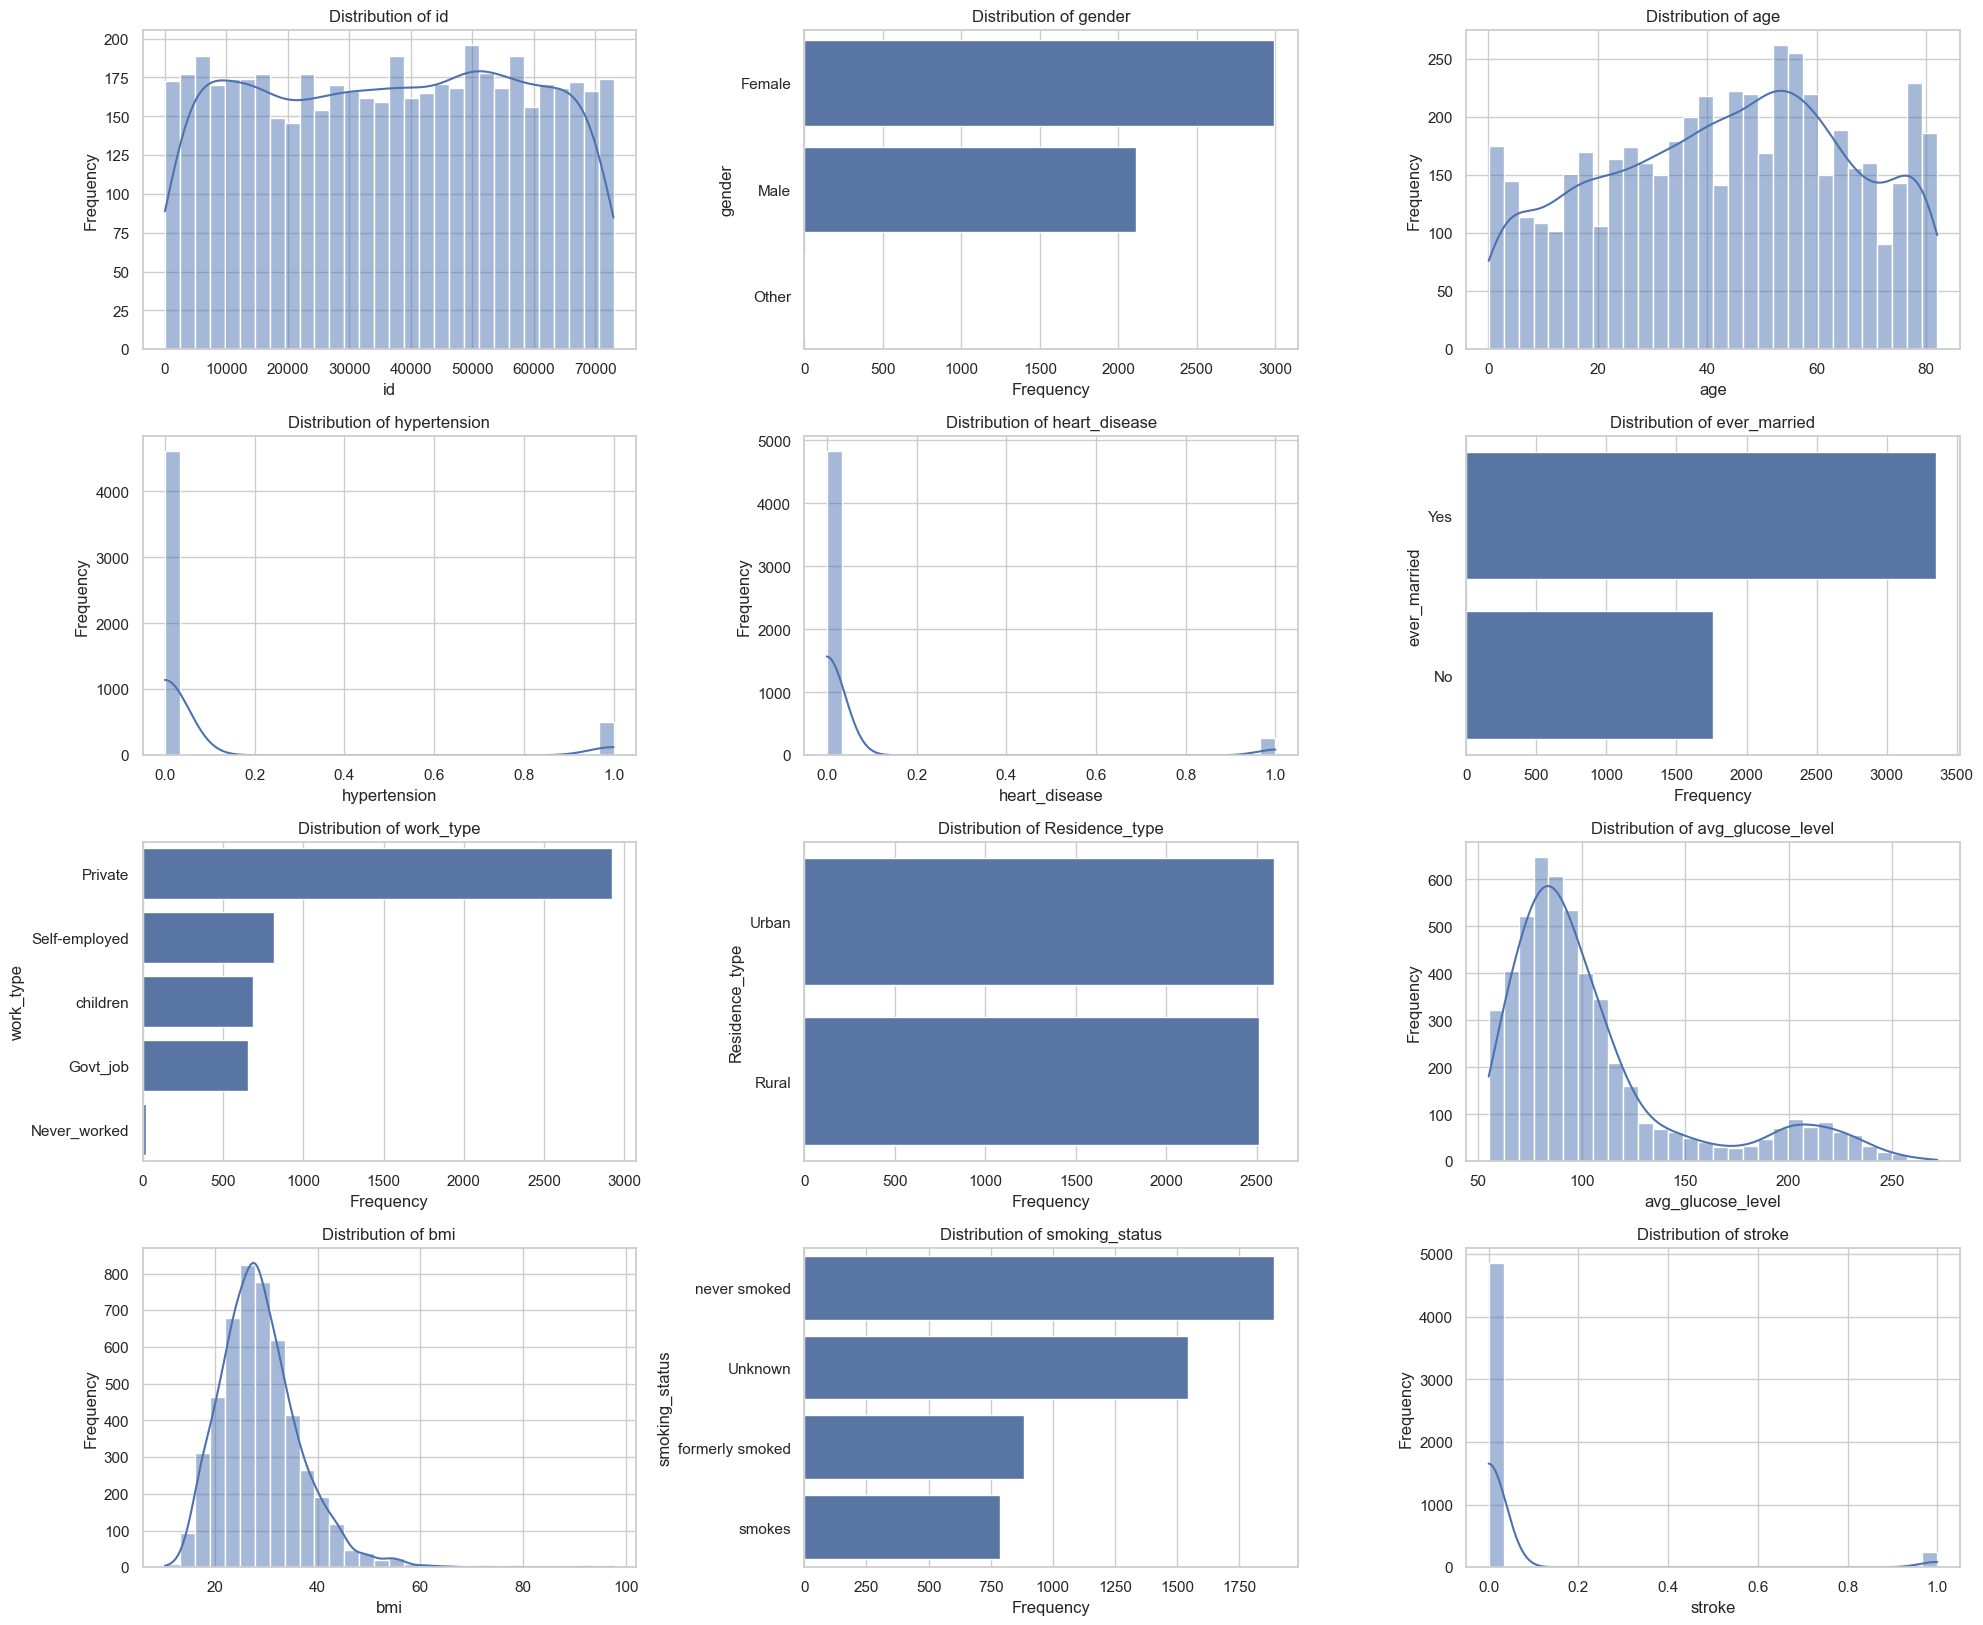

In [7]:
sns.set(style="whitegrid")
# Define the number of features for subplots
num_features = len(stroke_JB.columns) 

# Set up the matplotlib figure
plt.figure(figsize=(20, (num_features // 3) * 5))

# Iterate over columns for plotting individual distributions
for i, column in enumerate(stroke_JB.columns):
    plt.subplot(num_features // 3 + 1, 3, i + 1)  # Create subplots
    if stroke_JB[column].dtype in ['int64', 'float64']:
        sns.histplot(stroke_JB[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        sns.countplot(y=stroke_JB[column], order=stroke_JB[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Frequency')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

Given the shape of the distribution and the analysis above, using the median to fill the missing values in the `bmi` column is the most appropriate strategy in this scenario. This method will help maintain the integrity of dataset by minimizing the influence of outliers and providing a more representative central value for imputation.

In [8]:
# Fill missing values with the median
median_bmi = stroke_JB['bmi'].median()
stroke_JB['bmi'] = stroke_JB['bmi'].fillna(median_bmi)

In [9]:
# Check for missing values
print(stroke_JB.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [10]:
stroke_JB.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


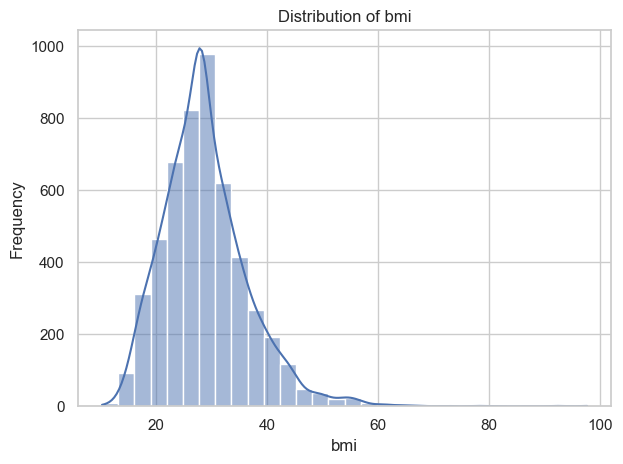

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


In [11]:
sns.histplot(stroke_JB['bmi'], kde=True, bins=30)
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(stroke_JB['bmi'].describe())

C:\Users\jaivb\AppData\Local\Temp\ipykernel_16688\1941428805.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_JB, palette='pastel')
C:\Users\jaivb\AppData\Local\Temp\ipykernel_16688\1941428805.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_JB, palette='pastel')
C:\Users\jaivb\AppData\Local\Temp\ipykernel_16688\1941428805.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_JB, palette='pastel')


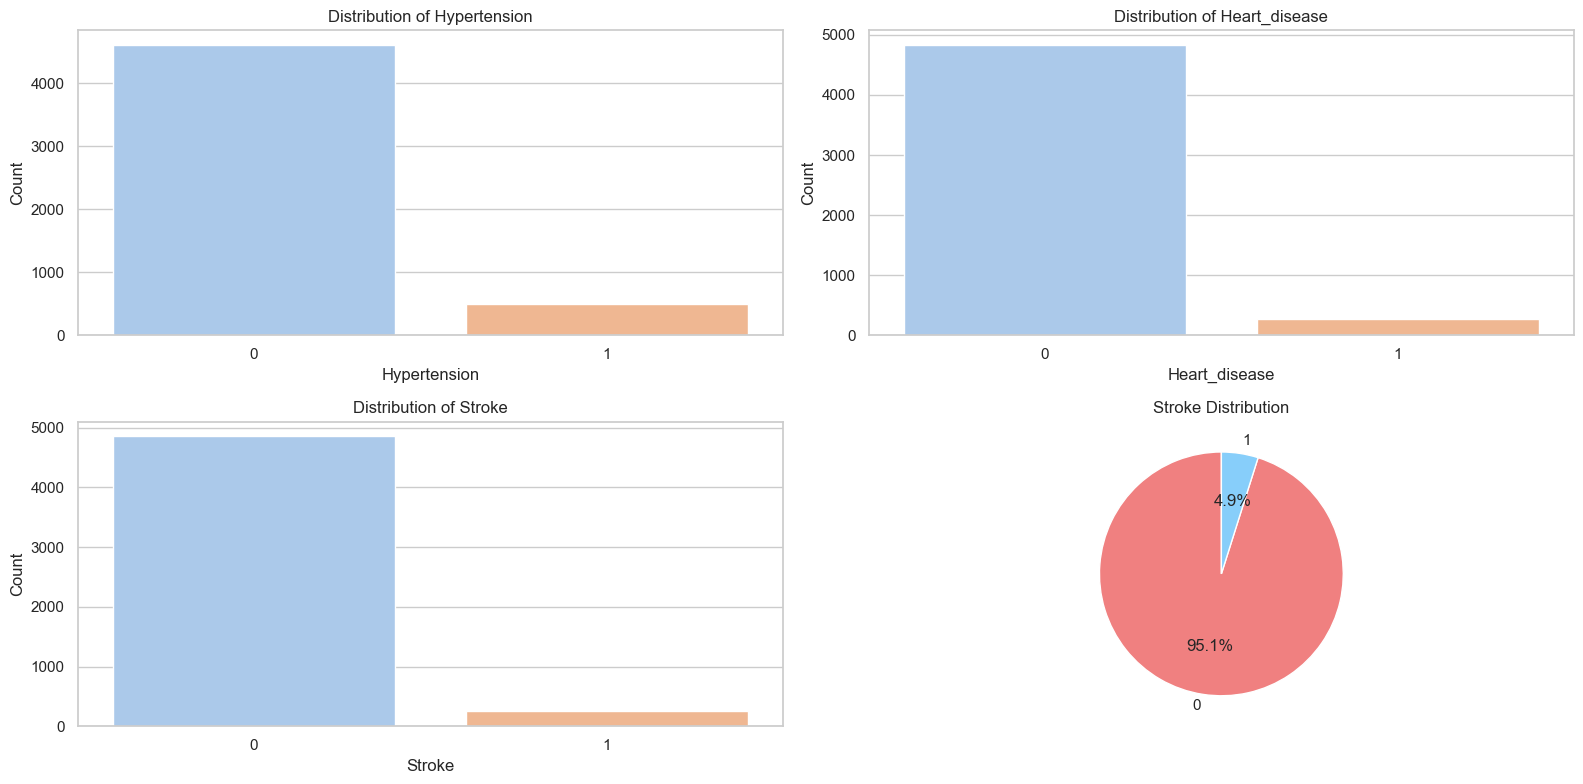

In [12]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting binary variables using count plots and pie charts
binary_variables = ['hypertension', 'heart_disease', 'stroke']

plt.figure(figsize=(16, 8))

# Creating subplots for each binary variable
for i, var in enumerate(binary_variables):
    plt.subplot(2, 2, i + 1)
    
    # Count plot for binary variables
    sns.countplot(x=var, data=stroke_JB, palette='pastel')
    
    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')

# Create a pie chart for the stroke distribution
plt.subplot(2, 2, len(binary_variables) + 1)
stroke_JB['stroke'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Stroke Distribution')
plt.ylabel('')  # Remove the y-label for clarity

plt.tight_layout()
plt.show()

b.  Encode the categorical features using categorical encoding 

In [13]:
print(stroke_JB.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [14]:
for varibles in binary_variables:
    stroke_JB[varibles]= stroke_JB[varibles].map({0:0, 1:1})
    
# One-Hot Encoding for other categorical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

stroke_JB_encoded = pd.get_dummies(stroke_JB, columns=categorical_features, drop_first=True)



In [15]:
stroke_JB_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [16]:
stroke_JB_encoded.dtypes

id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Male                          bool
gender_Other                         bool
ever_married_Yes                     bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
Residence_type_Urban                 bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object

### ML Model Training and Testing Tasks (31 Points): 


1. (2 point) Split the processed data into training and testing sets (e.g., 80% training, 20% testing). 


In [17]:
X = stroke_JB_encoded.drop(columns=['stroke'])  # Features
y = stroke_JB_encoded['stroke']  # Target variable

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
print("Training set shape:", X_train.shape, y_train.shape)


Training set shape: (4088, 17) (4088,)


In [19]:
print("Testing set shape:", X_test.shape, y_test.shape)


Testing set shape: (1022, 17) (1022,)


2. (8 points) Train the MLP model on the training set, however you need to do a comparison between the performance of the model on a validation set (with cross-validation) using different hyperparameter values: 

a. Need to try out 10 different overall variations of number of layers and number of neurons per layer. For example one variation could be 2 hidden layers with 64 neurons in first and 32 in second. 

In [20]:
# Defined the parameter grid for different architectures
param_grid = {
    'hidden_layer_sizes': [
        (64,),               # 1 hidden layer, 64 neurons
        (128,),              # 1 hidden layer, 128 neurons
        (64, 32),            # 2 hidden layers, 64 and 32 neurons
        (128, 64),           # 2 hidden layers, 128 and 64 neurons
        (32, 32, 32),        # 3 hidden layers, all 32 neurons
        (64, 32, 16),        # 3 hidden layers, 64, 32, and 16 neurons
        (256, 128),          # 2 hidden layers, 256 and 128 neurons
        (256,),              # 1 hidden layer, 256 neurons
        (64, 64, 32),        # 3 hidden layers, 64, 64, and 32 neurons
        (128, 32),           # 2 hidden layers, 128 and 32 neurons
    ],
    'max_iter': [1000],  # Maximum number of iterations
}

In [21]:
# Create the MLP model
mlp = MLPClassifier(random_state=42)

In [22]:
# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

In [23]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(64,), (128,), (64, 32),
                                                (128, 64), (32, 32, 32),
                                                (64, 32, 16), (256, 128),
                                                (256,), (64, 64, 32),
                                                (128, 32)],
                         'max_iter': [1000]},
             scoring='accuracy', verbose=1)

In [24]:
# Display the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'hidden_layer_sizes': (128,), 'max_iter': 1000}
Best cross-validation accuracy: 0.9543


b. Need to try out at least 3 different learning rate values.

Note: The GridSearchCV function in sklearn could help with that. 

In [25]:
# Defined the parameter grid for different architectures
param_grid_2 = {
    'hidden_layer_sizes': [
        (64,),               # 1 hidden layer, 64 neurons
        (128,),              # 1 hidden layer, 128 neurons
        (64, 32),            # 2 hidden layers, 64 and 32 neurons
        (128, 64),           # 2 hidden layers, 128 and 64 neurons
        (32, 32, 32),        # 3 hidden layers, all 32 neurons
        (64, 32, 16),        # 3 hidden layers, 64, 32, and 16 neurons
        (256, 128),          # 2 hidden layers, 256 and 128 neurons
        (256,),              # 1 hidden layer, 256 neurons
        (64, 64, 32),        # 3 hidden layers, 64, 64, and 32 neurons
        (128, 32),           # 2 hidden layers, 128 and 32 neurons
    ],
    'max_iter': [1000],  # Maximum number of iterations
    'learning_rate_init': [0.001, 0.01, 0.1]  # Different learning rates

}

In [26]:
# Create the MLP model
mlp_2 = MLPClassifier(random_state=42)

In [27]:
# Set up the grid search with 5-fold cross-validation
grid_search_2 = GridSearchCV(estimator=mlp_2, param_grid=param_grid_2, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

In [28]:
# Fit the model
grid_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(64,), (128,), (64, 32),
                                                (128, 64), (32, 32, 32),
                                                (64, 32, 16), (256, 128),
                                                (256,), (64, 64, 32),
                                                (128, 32)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [1000]},
             scoring='accuracy', verbose=1)

In [29]:
# Display the best parameters and the best score
print(f"Best parameters: {grid_search_2.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_2.best_score_:.4f}")

Best parameters: {'hidden_layer_sizes': (64,), 'learning_rate_init': 0.1, 'max_iter': 1000}
Best cross-validation accuracy: 0.9543


3. (2 Points) Comment on the best parameters found in step 2.

-   <b>Hidden Layer Size</b>: `(64,)` indicated a simple architecture with one hidden layer of 64 neurons, balancing complexity and generalization.
-   <b>Learning Rate</b>: `0.1` allows for quick convergence while maintaining stability, indicating effective learning dynamics.
-   <b>Max Iterations</b>: `1000` ensures sufficient training time.

Hence, <b>cross-validation accuracy of</b> `0.9543`, this demonstrates excellent predictive performance for our classification of stroke, portrays robust generalization to unseen data.

4. (3 Points) Evaluate the top-performing model from step 2 on the test set and report their F1-Score.

In [44]:
best_model = grid_search_2.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)

# Report the F1-Score
print(f"F1-Score on the test set: {f1:.4f}")

F1-Score on the test set: 0.0000


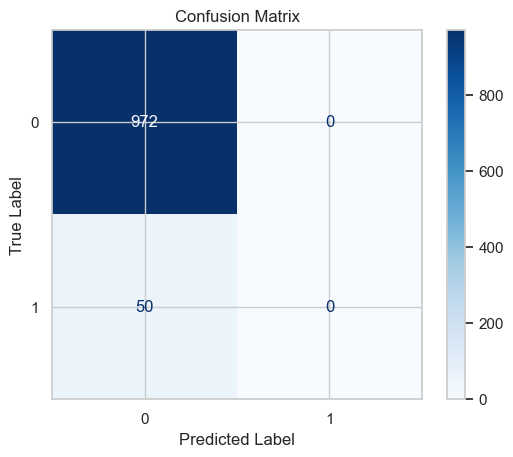

Confusion Matrix:
 [[972   0]
 [ 50   0]]


In [45]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:\n", cm)

5. (8 Points) Carry out PCA to reduce the dimensions of the dataset to a smaller size, then draw the scree plot and determine the optimal number of new dimensions. 

In [46]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- The features are standardized before applying PCA to ensure each feature contributes equally to the analysis. This is important for PCA since it is sensitive to the scale of the data

In [47]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

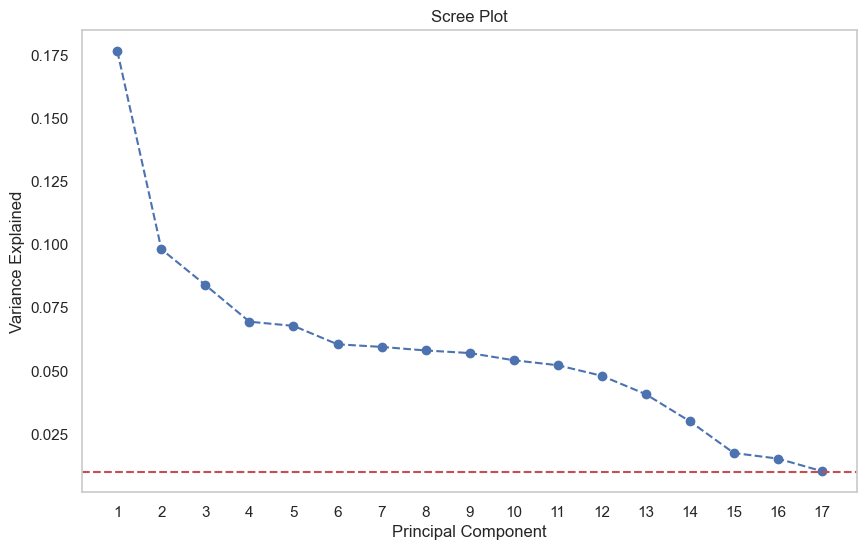

In [48]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.xticks(range(1, len(explained_variance) + 1))
plt.axhline(y=0.01, color='r', linestyle='--')
plt.show()

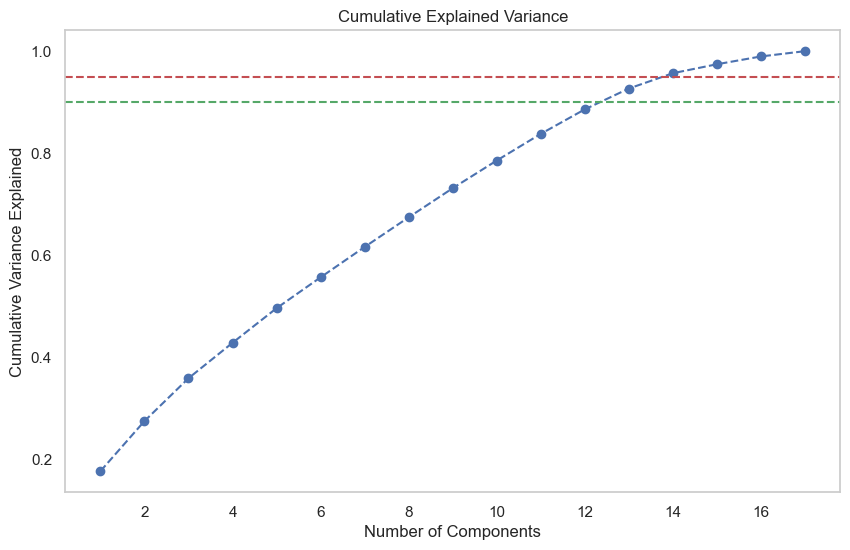

In [49]:
# Determine the optimal number of components
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% threshold line
plt.axhline(y=0.90, color='g', linestyle='--')  # 90% threshold line
plt.show()

1. <b>Initial Components (1-3):</b>
    -   The first principal component captures a substantial portion of the variance (approximately 17.5%), suggesting that it carries significant information. The second component still holds a meaningful amount (around 10%).
    -   Using 2 or 3 dimensions would allow capturing a good amount of variance while simplifying the model.
2. <b>Moderate Components (4-10):</b> 
    -   If you extend to 4-10 components, you begin to capture a substantial cumulative variance (close to 90%). This range often strikes a balance between retaining valuable information and reducing complexity.
    -   Using around 5-7 components can provide a practical trade-off between interpretability and performance.
3. <b>Higher Components (10-17):</b> 
    -   Beyond 10 components, the marginal gain in explained variance diminishes, which suggests that you may be adding noise rather than useful information.
    -   If your goal is to explain nearly all variability (tracking close to 100%), using up to 16 components might be considered, but this could lead to increased complexity and overfitting.

In summary, selecting about 5 to 7 dimensions seems optimal for retaining valuable information without overwhelming the model with complexity.

6. (4 points) Repeat step 2 and 4 again with the new dataset after dimensionality reduction with the optimal number of dimensions.  

Note: Evaluate the new model on the same test set as step 4, but after applying dimensionality reduction on it. 

In [50]:
# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)

n_components = 5  # Use the optimal number of dimensions determined
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test set using the same PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)



In [51]:
# Parameter grid for GridSearchCV on the new dataset
param_grid = {
    'hidden_layer_sizes': [
        (64,), 
        (128,), 
        (64, 32),
        (128, 64),
        (32, 32, 32),
        (64, 32, 16),
        (256, 128),
        (256,), 
        (64, 64, 32),
        (128, 32),
    ],
    'max_iter': [1000],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [52]:
# Create the MLP model
mlp_model = MLPClassifier(random_state=42)


In [53]:
# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the model using the PCA-transformed training data
grid_search.fit(X_train_pca, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(64,), (128,), (64, 32),
                                                (128, 64), (32, 32, 32),
                                                (64, 32, 16), (256, 128),
                                                (256,), (64, 64, 32),
                                                (128, 32)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [1000]},
             scoring='accuracy', verbose=1)

In [54]:
# Get the best model
best_model = grid_search.best_estimator_

# Predict on the PCA-transformed test set
y_pred = best_model.predict(X_test_pca)

In [55]:
# Calculate the F1-Score
f1 = f1_score(y_test, y_pred)

# Report the F1-Score
print(f"F1-Score on the test set after dimensionality reduction: {f1:.4f}")

F1-Score on the test set after dimensionality reduction: 0.0392


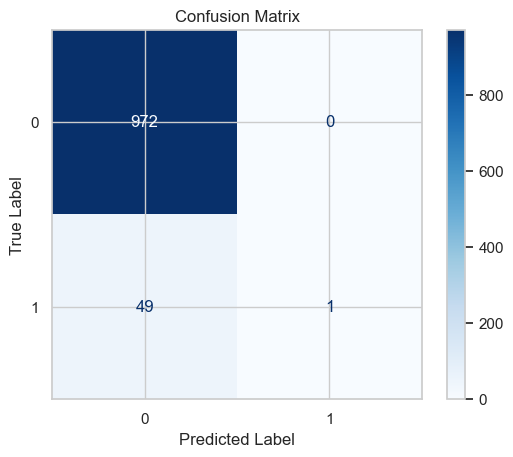

Confusion Matrix:
 [[972   0]
 [ 49   1]]


In [56]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:\n", cm)

7. (4 Points) Compare and comment on the outputs of Step 4 and 6 and determine whether dimensionality reduction lead to performance enhancement. 

After comparison of before and after dimensionality reduction:
-   <b>Before</b>:  The model failed completely to recognize any positive instances.
-   <b>After</b>:   The model improved to some extent by identifying a few positive instances, reflected in an F1-Score of 0.0392. This is a slight enhancement compared to the previous evaluation.

<b> Impact of Dimensionality Reduction </b>
-   Utilizing PCA for dimensionality reduction enabled the model to attain certain predictive performance, suggesting that a smaller number of more significant features could have benefited the learning process.
-   Nonetheless, the low F1-Score still reflects that the model's capacity to generalize and forecast positive cases is inadequate, indicating that dimensionality reduction by itself is not a cure-all. 

-   Nevertheless, the class imbalance remains a major issue, as shown by both assessments. A large quantity of occurrences in the negative class results in a predictive bias, causing the model to favor predicting the majority class.

Although dimensionality reduction resulted in a minor performance improvement (increasing the F1-Score from 0.0000 to 0.0392), it was inadequate for attaining strong predictive ability. The fundamental class imbalance and potentially inadequate model architecture continue to be significant challenges.